## **Day 22 of 30 days Data Analysis**

### ***Continue with the dashboard preparation***

### ***1. Dataset Overview:***

In [8]:
import pandas as pd 

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_clean_d08.csv")

print(df.shape)
print(df.info())
print(df.isnull().sum())
df.head()

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     0 non-null      float64
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,NaN,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,NaN,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,NaN,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaN,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,NaN,Ewallet,604.17,4.761905,30.2085,5.3


*Dataset is clean with no missing values. Contains transactional data with products, sales, customer type, and time-based features.*

### ***2. Top Products by Sales:***

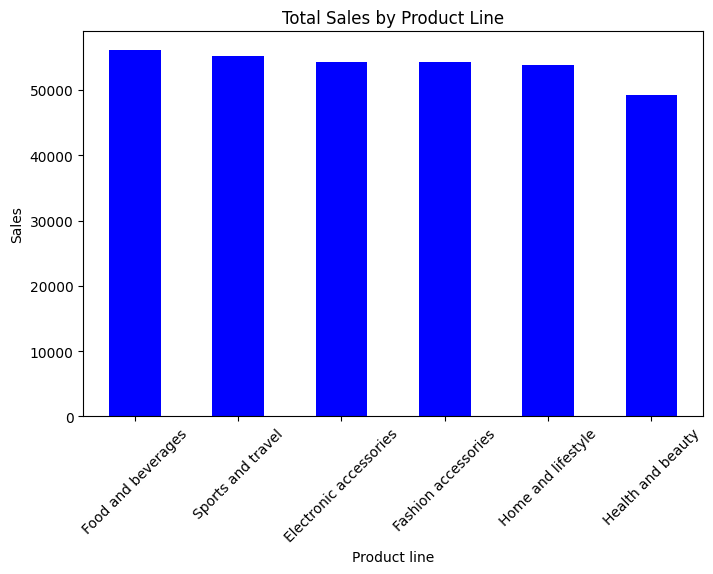

In [9]:
top_products = df.groupby("Product line")["Sales"].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_products.plot(kind="bar", color="blue")
plt.title("Total Sales by Product Line")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

*Food and Beverages and Sports and travel drive the most revenue.*

### ***3. Sales by City:***

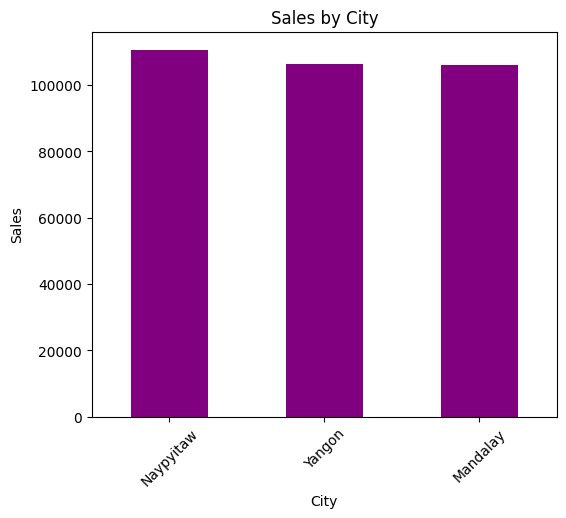

In [11]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,5))
city_sales.plot(kind="bar", color="purple")
plt.title("Sales by City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

*Naypyitaw leads in total sales, followed by Yangon.*

### ***4. Customer Type & Payment Prefence:***

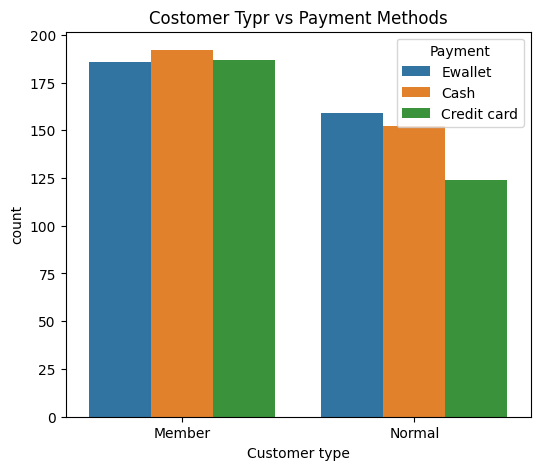

In [12]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.countplot(x="Customer type", hue="Payment", data=df)
plt.title("Costomer Typr vs Payment Methods")
plt.show()

*Members perfer E-wallet, while Noraml customers show a blanced use of payment mothods.*

### ***5. Correlation Heatmap:***

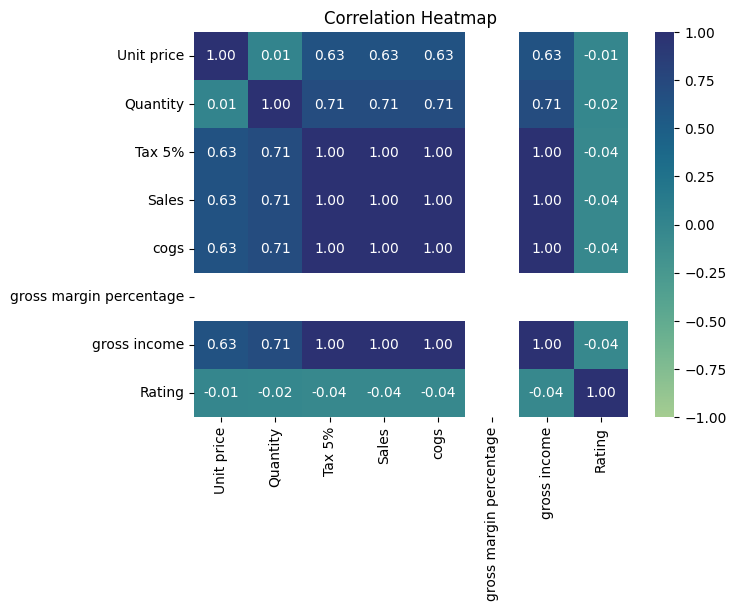

In [32]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).dropna(axis=1, how="all")

plt.figure(figsize=(7,5))
sns.heatmap(numeric_cols.corr(), vmin=-1, vmax=1, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

*Note: gross margin percentage has constant values, so its correlation with other variables is 0.*

*Strong correlation between Sales, Tax 5%, and cogs. Quantity moderrately impacts Sales.*

### ***6. Save Key outputs for Dashboard:***

In [29]:
# Save important aggregated data for dashboard use
top_products.to_csv("../datasets/top_products.csv")
city_sales.to_csv("../datasets/city_sales.csv")
df.to_csv("../datasets/final_dataset.csv", index=False)

### ***Final Insights***

*- Food & Beverages and Sport and travel generate the highest revenue.*

*- Naypyitaw city is the top-performing location.*

*- E-wallet is the most preferred payment method among members.*

*- Sales directly correlate with cogs and tax, confirming consistent pricing margins.*